In [1]:
import pandas as pd 
import numpy as np


In [2]:
data = pd.read_csv('/kaggle/input/houseprices-dataset/houseprices.csv')
data

,Price,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace
0,142212,1982,1.0,3,2.00,133,0
1,134865,1676,1.5,3,0.38,14,1
2,118007,1694,2.0,3,0.96,15,1
3,138297,1800,1.0,2,0.48,49,1
4,129470,2088,1.0,3,1.84,29,1
...,...,...,...,...,...,...,...
1042,107695,1802,2.0,4,0.97,56,1
1043,236737,3239,3.5,4,2.50,1,1
1044,154829,1440,2.0,2,0.61,66,1
1045,179492,2030,2.5,3,1.00,3,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1047 non-null   int64  
 1   Living Area  1047 non-null   int64  
 2   Bathrooms    1047 non-null   float64
 3   Bedrooms     1047 non-null   int64  
 4   Lot Size     1047 non-null   float64
 5   Age          1047 non-null   int64  
 6   Fireplace    1047 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 57.4 KB


In [4]:
data = data.drop(['Age','Bathrooms','Bedrooms','Lot Size','Fireplace'],axis =1)

In [5]:
print(data.columns)
data

Index(['Price', 'Living Area'], dtype='object')


,Price,Living Area
0,142212,1982
1,134865,1676
2,118007,1694
3,138297,1800
4,129470,2088
...,...,...
1042,107695,1802
1043,236737,3239
1044,154829,1440
1045,179492,2030


In [6]:
x=data['Living Area'].values

# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# x_train=sc.fit_transform(x_train)
x = x / max(x)

In [7]:
x.shape

(1047,)

In [8]:
y=data['Price'].values
y

array([142212, 134865, 118007, ..., 154829, 179492, 189108])

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1234)

In [10]:
import matplotlib.pyplot as plt

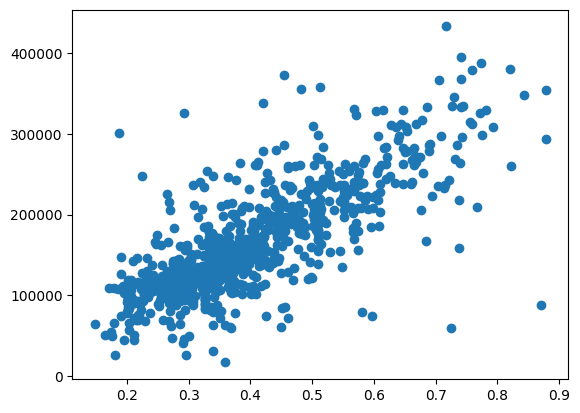

In [11]:
plt.scatter(x_train,y_train)

In [12]:
def pred(x,w,b):
    return w*x+b
def cost_ftn(y_hat,y):
    return 1/(2*len(y))*np.sum((y_hat-y)**2)
def gradient(x,y,w,b):
    costs=[]
    w_and_b=[]
    lr=0.1
    epochs=1000
    m=x.shape[0]
    predicted=[]
    for i in range(epochs):
        y_hat=pred(x,w,b)
        dw=np.mean((y_hat-y)*x)
        db=np.mean(y_hat-y)
        w-=lr*dw
        b-=lr*db
        cost=cost_ftn(y_hat,y)
        costs.append(cost)
        predicted.append(y_hat)
        w_and_b.append([w,b])
    return costs,predicted,w_and_b

In [13]:
w=np.random.randn()
b=np.random.randn()


In [14]:
yp=pred(x_train,w,b)
yp

array([-0.51403077, -0.47852042, -0.40477919, -0.46191075, -0.45360591,
       -0.48059663, -0.49971208, -0.42539809, -0.44888074, -0.46584838,
       -0.39962446, -0.39933808, -0.45353431, -0.45460822, -0.47350888,
       -0.40306094, -0.4220332 , -0.51517626, -0.51245571, -0.44028953,
       -0.40749974, -0.44157821, -0.4646313 , -0.45632646, -0.45188767,
       -0.53035407, -0.46885531, -0.4231071 , -0.44258052, -0.46033569,
       -0.43943041, -0.42554128, -0.4939846 , -0.50615549, -0.42604244,
       -0.44830799, -0.42224798, -0.49455735, -0.45346272, -0.48446268,
       -0.46864053, -0.39962446, -0.47093152, -0.39618797, -0.48038185,
       -0.48582295, -0.42138886, -0.5005712 , -0.45890382, -0.45195926,
       -0.53207231, -0.45861745, -0.51990143, -0.4308392 , -0.5322155 ,
       -0.39962446, -0.47264976, -0.42697315, -0.43284381, -0.43964519,
       -0.50415087, -0.39747666, -0.47673059, -0.4841763 , -0.45331953,
       -0.44687612, -0.45446503, -0.44429876, -0.43957359, -0.48

In [15]:
total_cost,predict,w_and_b=gradient(x_train,y_train,w,b)

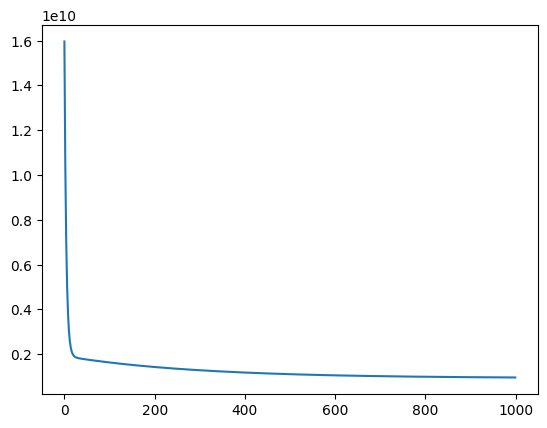

In [16]:

plt.plot(total_cost)
plt.show()

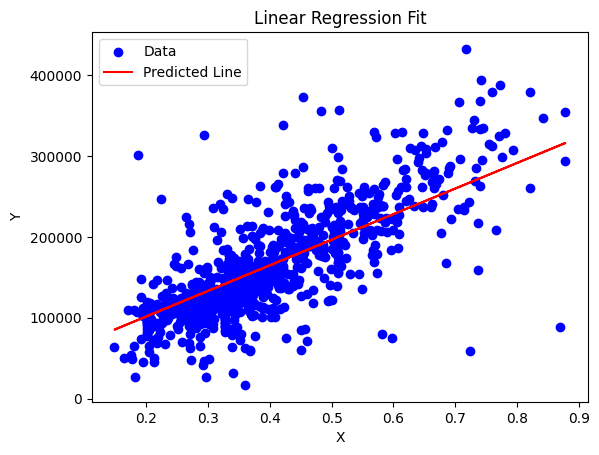

In [17]:

plt.scatter(x_train, y_train, color='blue', label='Data')


plt.plot(x_train, predict[-1], color='red', label='Predicted Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


In [18]:
final=w_and_b[-1]
final_w=final[0]
final_w

316697.7976240729

In [19]:
final_b=final[1]
final_b

38313.711293761495

In [20]:
y_prd=pred(x_test,final_w,final_b)

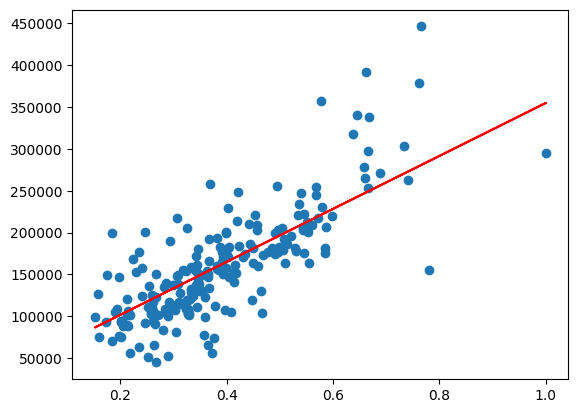

In [21]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_prd,color='red')

In [22]:
x_tested=pred(x_test,w,b)

In [23]:
y_pred_test = pred(x_test, final_w, final_b)


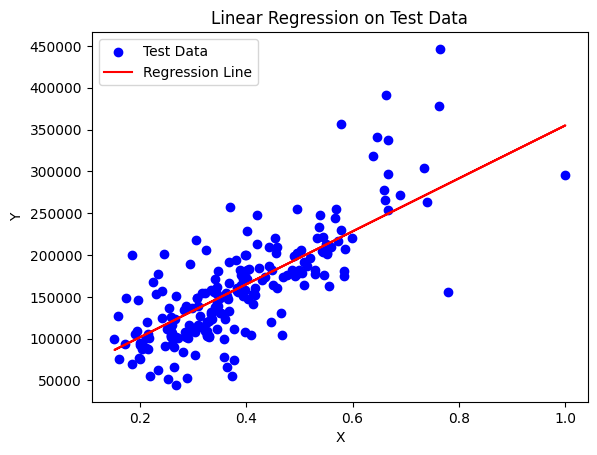

In [24]:
plt.scatter(x_test, y_test, color='blue', label='Test Data')

# Plot the regression line
plt.plot(x_test, y_pred_test, color='red', label='Regression Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression on Test Data')
plt.legend()
plt.show()
